In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

In [13]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [16]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
from sklearn.model_selection import train_test_split

In [39]:
# 훈련 데이터와 테스트 데이터 준비
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
print('훈련 점수 :',model.score(X_train, y_train) )
print('테스트 점수 :',model.score(X_test, y_test) )


훈련 점수 : 0.7697699488741149
테스트 점수 : 0.6354638433202128


In [41]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2score = r2_score(y_test, y_pred)
print(f'MSE:{mse:.3f}, RMSE:{rmse:.3f}, R2SCORE:{r2score:.3f}')

MSE:29.782, RMSE:5.457, R2SCORE:0.635


In [42]:
print('가중치:\n',np.round(model.coef_,1)) #가중치
print('편향:\n',np.round(model.intercept_,1)) #편향


가중치:
 [ -0.1   0.   -0.    2.4 -15.6   3.8  -0.   -1.4   0.2  -0.   -1.    0.
  -0.5]
편향:
 36.9


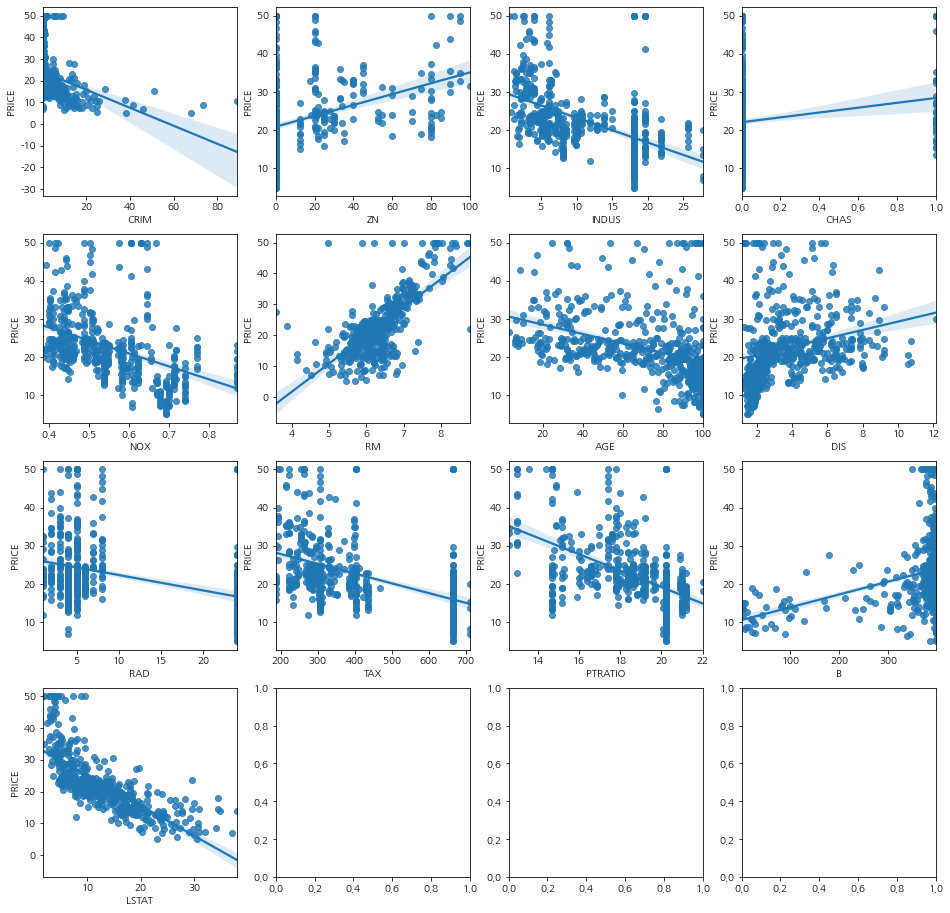

In [45]:
fig, axes = plt.subplots(4, 4, figsize=(16,16))
for i, feature in enumerate(X.columns):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y = 'PRICE', data=df, ax=axes[row][col])

In [46]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [47]:
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [49]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train,y_train)

0.7824123695930644

In [51]:
from sklearn.datasets import load_boston
import mglearn
X, y = mglearn.datasets.load_extended_boston()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [61]:
model = LinearRegression()
model.fit(X_train,y_train)
print('학습점수:', model.score(X_train, y_train))
print('테스트점수:',model.score(X_test,y_test))

학습점수: 0.952051960903273
테스트점수: 0.6074721959665854


In [64]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [67]:
X = iris.data[:,0]
y = iris.data[:,2]


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y, random_state=0)

In [71]:
X_train.shape

(112, 1)

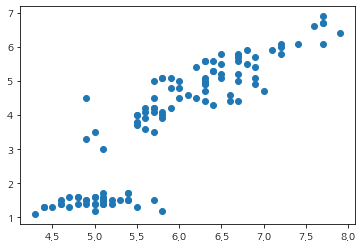

In [72]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train)

In [75]:
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.7864459990171913

In [76]:
model.score(X_test,y_test)

0.6634802872219326

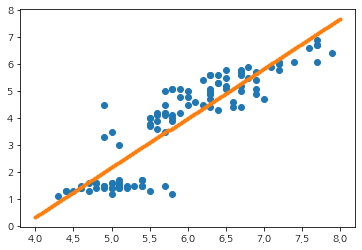

In [78]:
plt.scatter(X_train,y_train)
xx = np.linspace(4, 8, 200)
yy = model.coef_ * xx + model.intercept_
plt.scatter(x=xx, y=yy, marker='.')

In [79]:
from sklearn.datasets import load_iris
iris = load_iris()

In [80]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [81]:
X = iris.data[:,2]
y = iris.data[:,3]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y ,random_state=0)

In [86]:
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.9358824215964661

In [87]:
model.score(X_test,y_test)

0.8931453922584154

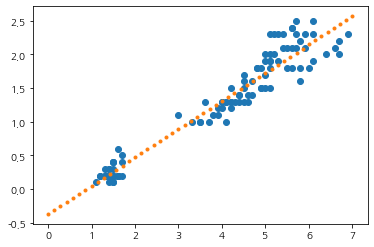

In [96]:
plt.scatter(X_train,y_train)
xx = np.linspace(0, 7, 50)
yy = model.coef_ * xx + model.intercept_
plt.scatter(x=xx, y=yy, marker='.')

-0.3705841202176683